# 1주차 과제 설명

- 아래를 포함한 전처리 및 EDA 과정 진행
- 1. 결측값이 있는 모든 열을 없애기
- 2. 모든 연속형 변수 간의 상관관계를 heatmap 
- 3. 모든 연속형 변수의 분포를 histogram 
- 4. target 변수와 관련 or 유의미한 insigt 시각화 5개이상 -> subplot 활용

- 1~4 에서 도출된 시각화 + insigt를 바탕으로 유의미한 feature를 10개 이상 생성

***

## _전처리_

### Auction_master_train.csv 로 진행
### target 변수는 hammer price

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맑은 고딕을 사용하겠습니다 !
plt.style.use('seaborn') # seaborn 스타일로 변환 (기본은 못생겼어요..)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.set_option('max_columns', 50,'max_rows', 20) 

In [9]:
df = pd.read_csv("Auction_master_train.csv")

In [4]:
df.head(3)

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999


### 결측치 제거

In [10]:
# 결측치 있는 열 확인
df.isnull().sum(axis=0)

Auction_key                     0
Auction_class                   0
Bid_class                       0
Claim_price                     0
Appraisal_company               0
Appraisal_date                  0
Auction_count                   0
Auction_miscarriage_count       0
Total_land_gross_area           0
Total_land_real_area            0
                             ... 
Specific                     1869
Share_auction_YorN              0
road_name                       0
road_bunji1                    24
road_bunji2                  1778
Close_date                      0
Close_result                    0
point.y                         0
point.x                         0
Hammer_price                    0
Length: 41, dtype: int64

## df_drop.describe()
- 데이터가 하나라도 결측치 있는 것을 날리는 방법으로 열단위 제거하면 모두 날라가는 것을 확인.
- 결측치가 있는 column은 주로 주소 데이터로 수치가 아니라 일련번호임.
- 주소 데이터가 타겟에 큰 영향을 주지 않을 것으로 판단하고 결측치들을 mean으로 대치

In [11]:
# fillna 함수 사용해서 column별 평균값으로 nan 대치
df_mod = df.fillna(df.mean())

In [12]:
# 평균값 대치 안되는 변수는 0으로 nan대치
df_mod = df.fillna(0)

In [13]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

### taraget인 Hammer_price에 있는 이상치 제거 - IQR 기준

In [14]:
# Hammer_price 이상치 제거

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    a = [lower_bound,upper_bound]
    return a

In [15]:
outliers = outliers_iqr(df_mod["Hammer_price"])
lower = outliers[0]
upper = outliers[1]

In [16]:
upper

1103417500.0

In [17]:
df2 = df_mod.query("Hammer_price < @upper")
print(df2.shape)

(1796, 41)


### scale 처리 
- Claime_price 와 Hammer_price가 단위가 너무 크므로 log 변환해줌

In [18]:
Claim_price2 = np.log(df2["Claim_price"])
Hammer_price2 = np.log(df2["Hammer_price"])

C:\Users\jinji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [19]:
df3 = df2.copy()
df3['Claim_price2'] = Claim_price2
df3['Hammer_price2'] = Hammer_price2

***

## _연속형 변수 시각화_

In [20]:
# 연속형 변수만 처리
df_temp = df2.select_dtypes(exclude = ['object'])

In [21]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 0 to 1932
Data columns (total 20 columns):
Auction_key                    1796 non-null int64
Claim_price                    1796 non-null int64
Auction_count                  1796 non-null int64
Auction_miscarriage_count      1796 non-null int64
Total_land_gross_area          1796 non-null float64
Total_land_real_area           1796 non-null float64
Total_land_auction_area        1796 non-null float64
Total_building_area            1796 non-null float64
Total_building_auction_area    1796 non-null float64
Total_appraisal_price          1796 non-null int64
Minimum_sales_price            1796 non-null int64
addr_bunji1                    1796 non-null float64
addr_bunji2                    1796 non-null float64
Total_floor                    1796 non-null int64
Current_floor                  1796 non-null int64
road_bunji1                    1796 non-null float64
road_bunji2                    1796 non-null float64
point.y 

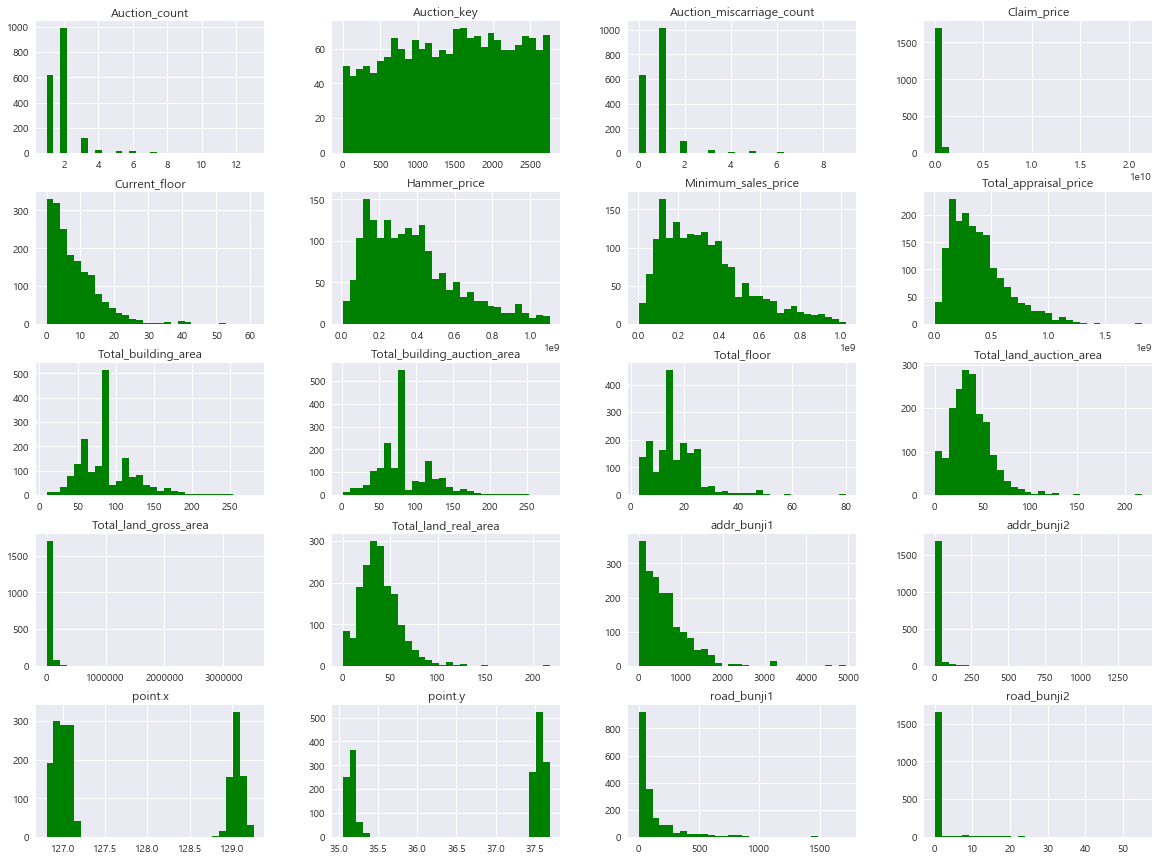

In [22]:
# 히스토그램, 자동으로 연속형 변수만 그려줌
df_temp.hist(bins=30,figsize=(20,15),color='Green') #figsize를 통해 plot 크기 조절
plt.show()

- hist를 찍어보면 변수별 scale이 달라서 유의미 해 보이는 결과 찾지 못함.

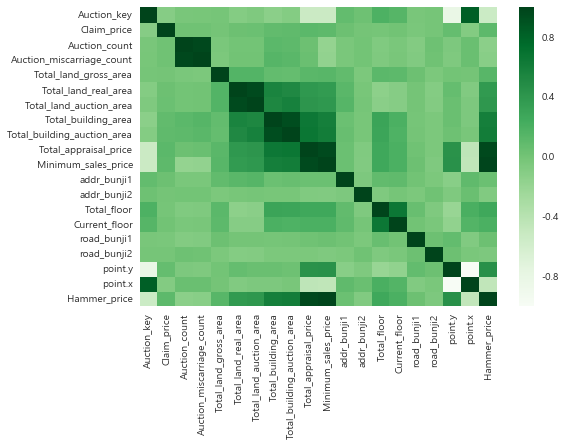

In [24]:
# heatmap 연속형 변수의 상관계수로 그래프 나타냄
sns.heatmap(df_temp.corr(),cmap='Greens')
plt.show()

- target인 Hammer_price와 heatmap상 유의미한 변수를 찾아보면
- Total_land_real_area
- Total_land_auction_area
- Total_building_area
- Total_building_auction_area
- Total_appraisal_price
- Minimum_sales_price

- 좀 더 작지만 유의미 해보이는 상관관계를 가지는 변수는 
- Claim_price, Total_floor, Current_floor, point.y


In [23]:
coef = df_temp.loc[:,['Total_land_real_area','Total_land_auction_area','Total_building_area','Total_building_auction_area','Total_appraisal_price','Minimum_sales_price','Claim_price', 'Total_floor', 'Current_floor', 'point.y','Hammer_price']]
coef

,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Claim_price,Total_floor,Current_floor,point.y,Hammer_price
0,37.35,37.35,181.77,181.77,836000000,668800000,1766037301,45,5,35.162717,760000000
1,18.76,18.76,118.38,118.38,1073000000,858400000,152946867,70,51,35.156633,971889999
2,71.00,71.00,49.94,49.94,119000000,76160000,11326510,15,14,35.184601,93399999
3,32.98,32.98,84.91,84.91,288400000,230720000,183581724,20,11,35.154180,256899000
4,45.18,45.18,84.96,84.96,170000000,136000000,45887671,7,7,35.099630,158660000
5,41.39,41.39,84.46,84.46,222000000,177600000,105437195,20,17,35.086933,206989000
6,81.77,81.77,112.70,112.70,188000000,120320000,137548730,6,6,35.084049,135500000
7,92.22,92.22,243.35,243.35,667000000,533600000,506916971,24,13,35.127808,640299999
8,66.44,66.44,67.21,67.21,94000000,75200000,40782876,3,1,35.080817,77380000
9,78.52,78.52,84.92,84.92,163000000,130400000,150000000,5,4,35.187903,177070000


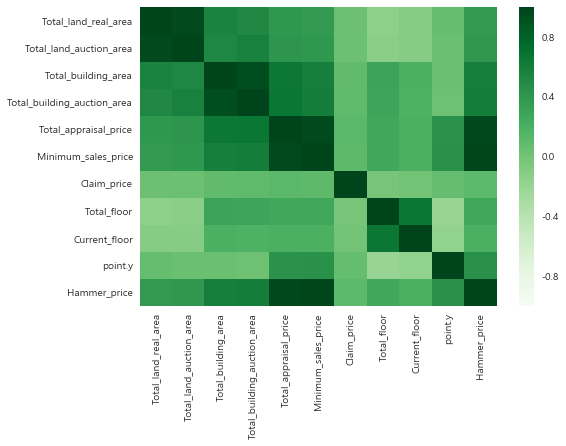

In [26]:
# heatmap 유의미해보이는 연속형 변수의 상관계수로 그래프 나타냄
sns.heatmap(coef.corr(),cmap='Greens')
plt.show()

C:\Users\jinji\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


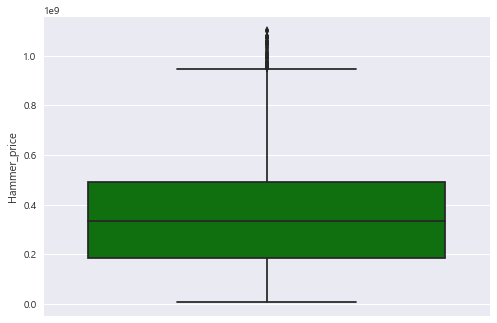

In [27]:
# Target인 Hammper Price의 boxplot
sns.boxplot(x = "Hammer_price", orient = "v", data = df2, color = "green")
plt.show()

C:\Users\jinji\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jinji\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


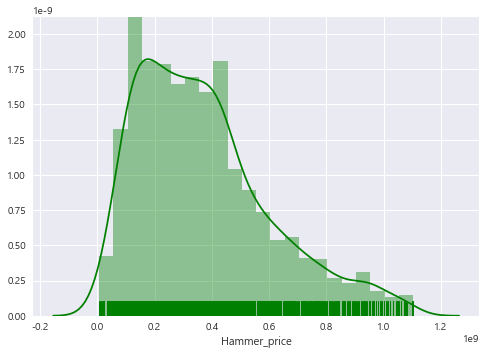

In [28]:
sns.distplot(df2['Hammer_price'], kde=True, rug=True,color = 'green')

-> Hammer_price는 5억 아래의 아파트가 많이 분포되어 있음을 알 수 있다. 중위값도 3억 5천 정도에 분포

***

# 위의 시각화와 insigt 바탕으로 feature 10개 생성

### 1. price 4개를 log scale로 맞춰준다. 
- Total_appraisal_price
- Minimum_sales_price
- Claim_price
- Hammer_price  
_가격의 단위를 다른 변수들과 비슷하게 맞출 수 있으며, log 를 씌울경우 단순 수치가 변화율로 해석됨._

In [32]:
Total_appraisal_price2 = np.log(df2["Total_appraisal_price"])
Minimum_sales_price2 = np.log(df2["Minimum_sales_price"])
# Claim_price2,Hammer_price2 는 위에서 scale 처리시 만듦

In [33]:
price2 = pd.DataFrame(Hammer_price2)
price2['Claim_price2'] = Claim_price2
price2['Total_appraisal_price2'] = Total_appraisal_price2
price2['Minimum_sales_price2'] = Minimum_sales_price2

In [34]:
price2

,Hammer_price,Claim_price2,Total_appraisal_price2,Minimum_sales_price2
0,20.448829,21.292004,20.544139,20.320996
1,20.694753,18.845601,20.793724,20.570581
2,18.352402,16.242657,18.594634,18.148347
3,19.364194,19.028170,19.479859,19.256715
4,18.882274,17.641707,18.951309,18.728165
5,19.148176,18.473626,19.218188,18.995044
6,18.724482,18.739489,19.051953,18.605665
7,20.277447,20.043858,20.318301,20.095157
8,18.164239,17.523773,18.358805,18.135662
9,18.992056,18.826146,18.909261,18.686117


### 2. Different1 : 감정차이
- 낙찰가 - 감정가 : Hammer_price - Total_appraisal_price

In [102]:
different1 = df2['Hammer_price']-df2['Total_appraisal_price']
different1

0       -76000000
1      -101110001
2       -25600001
3       -31501000
4       -11340000
5       -15011000
6       -52500000
7       -26700001
8       -16620000
9        14070000
          ...    
1922      2100000
1923     30015000
1924     14616100
1925      2755000
1926      4588000
1927    -34100500
1928      1500000
1929    -23765400
1931     -4000000
1932    -63990000
Length: 1796, dtype: int64

### 3. Different2 : 신청가격 차이
- 낙찰가 - 경매신청인의 청구금액 : Hammer_price - Claim_price

In [25]:
different2 = df2['Hammer_price']-df2['Claim_price']
different2

0      -1006037301
1        818943132
2         82073489
3         73317276
4        112772329
5        101551805
6         -2048730
7        133383028
8         36597124
9         27070000
           ...    
1922     484100000
1923     248786370
1924     274784539
1925      60774417
1926     203588000
1927     155899500
1928     122500000
1929     230234600
1931     323000000
1932     506010000
Length: 1796, dtype: int64

### 4. Auction period : 경매기간 
- 최종경매일 - 최초경매일 : Final_auction_date - First_auction_date

In [26]:
from datetime import datetime, timedelta

In [27]:
def convertdate(dstring):
    return datetime.strptime(dstring, '%Y-%m-%d  %H:%M:%S')

def convertdelta(delta):
    return delta.days

In [28]:
First_auction_date2 = df2['First_auction_date'].apply(convertdate)
Final_auction_date2 = df2['Final_auction_date'].apply(convertdate)
Auction_period = Final_auction_date2 - First_auction_date2
df2['Auction_period'] = Auction_period.apply(convertdelta)

C:\Users\jinji\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [43]:
df2.head(3)

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,Auction_period
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,0,N,1398.0,0.0,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,0,N,해운대해변로,30.0,0.0,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,35
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,0,N,1407.0,0.0,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,0,N,마린시티2로,33.0,0.0,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,35
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,0,N,552.0,0.0,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,0,N,모라로110번길,88.0,0.0,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,77


### 5. Hammer counts : 낙찰횟수
- 총 경매 횟수 - 유찰횟수 = 낙찰횟수 : Auction_count - Auction_miscarriage_count

In [29]:
Hammer_counts = df2['Auction_count']-df2['Auction_miscarriage_count']

In [30]:
Hammer_counts.describe()

count    1796.000000
mean        1.047327
std         0.232436
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
dtype: float64

### 6. Building age : 건물 노후 정도
- 건물 등록일 - 최초 경매일 : Preserve_regist_date - First_auction_date

In [46]:
def convertdate2(dstring):
    return datetime.strptime(dstring, '%Y-%m-%d').date()

In [77]:
# Preserve_regist_date2 = df2['Preserve_regist_date'].apply(convertdate2)

In [51]:
Preserve_regist_date2     
# 건물등록일의 데이터타입이 datetime이 아니라 object로 나와서 날짜 기간 계산 안됨....해결못함..

NameError: name 'Preserve_regist_date2' is not defined

### 7. After Appraisal period : 감정 후 첫 경매까지의 기간
-  최초 경매 날짜 - 감정일 :  First_auction_date - Appraisal_date

In [31]:
Appraisal_date2 = df2['Appraisal_date'].apply(convertdate)
After_appraisal_period =  First_auction_date2 - Appraisal_date2
df2['After_appraisal_period'] = After_appraisal_period.apply(convertdelta)

C:\Users\jinji\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
df2['After_appraisal_period'].describe()

count    1796.000000
mean      209.191537
std       155.542483
min     -1729.000000
25%       132.000000
50%       173.000000
75%       242.000000
max      2346.000000
Name: After_appraisal_period, dtype: float64

### 8. Building density : 건물 밀집도
- 총건물경매면적 / 총토지경매면적 : Total_building_auction_area / Total_land_auction_area  

_좁은 토지에 세운 건물이면 더 높은 값을 가질 것_

In [33]:
Building_density = (df2['Total_building_auction_area'])/(df2['Total_land_auction_area'])
Building_density.describe()

count    1796.000000
mean             inf
std              NaN
min         0.576633
25%         1.791071
50%         2.238268
75%         2.882932
max              inf
dtype: float64

### 9-10. 지역별 매물 갯수
- BC : Auction_count 중 addr_do 부산 갯수
- SC : Auction_count 중 addr_dp 서울 갯수

In [34]:
BC = df2.query('addr_do == "부산"').shape[0]
SC = df2.query('addr_do == "서울"').shape[0]
BC,SC

(685, 1111)

***

# 2주차 과제 설명
## 위의 1주차 과제 일부 수정

- 1주차 과제 데이터를 가지고 선형회귀에 필요한 EDA 및 전처리
- 1. 범주형 변수 인코딩 3개 이상, EDA 3개 이상
- 2. 선형회귀분석, target = Hammer_price 
- 3. 적합된 회귀식에 대해 데이터의 행렬을 통해 <Beta,MSE> 구한 것과 비교
- --> 회귀식으로 구한 값과 데이터의 행렬 통해 구한 값 비교

 #### 1. 낙찰횟수 Hammer_price 인코딩
 - 1이하 0, 1초과 1

In [37]:
Hammer_counts.value_counts()

1    1717
2      75
4       2
3       2
dtype: int64

In [82]:
def encoding1(x):
    if x<=1:
        return 0
    else:
        return 1

In [83]:
Hammer_counts_en = Hammer_counts.apply(encoding1)
variables=pd.DataFrame(Hammer_counts_en,columns=['Hammer_counts_en'])
variables.head(3)

,Hammer_counts_en
0,0
1,0
2,0


In [84]:
variables['Hammer_counts_en'].value_counts()

0    1717
1      79
Name: Hammer_counts_en, dtype: int64

 #### 2. 감정 후 첫 경매까지 기간 인코딩
 - After_apparaisal_period
 - 0 미만 -> 0
 - 0~200 -> 1
 - 200 초과 -> 2

In [86]:
def encoding2(x):
    if x<0:
        return 0
    elif (x>=0) & (x<=200):
        return 1
    else :
        return 2

In [98]:
variables['After_apparaisal_period_en'] = df2['After_appraisal_period'].apply(encoding2)
variables.head(2)

,Hammer_counts_en,After_apparaisal_period_en
0,0,2
1,0,1


 #### 3. Different1 : 감정차이
 - Hammer_price - Total_appraisal_price
 - 0 미만 -> 0
 - 0 이상 -> 1

In [100]:
def encoding3(x):
    if x<0:
        return 0
    else:
        return 1

In [103]:
variables['different1_en'] = different1.apply(encoding3)
variables.head(2)

,Hammer_counts_en,After_apparaisal_period_en,different1_en
0,0,2,0
1,0,1,0


In [106]:
variables['different1_en'].value_counts()

0    970
1    826
Name: different1_en, dtype: int64

## EDA 3개 이상
### 회귀분석 전에 target과 상관있어 보이는 변수들을 확인 후에 진행함.
### 위에서 target과 상관관계가 높았던 변수들에 대해서 회귀분석함.
- 1. df2 연속형 변수들 간 pairplot
- 2. 다중 선형회귀 돌리고 싶은 변수들만 pairplot
- 3. target 제외하고 variables에 선형회귀 변수들 넣어서 vif 찍기
 

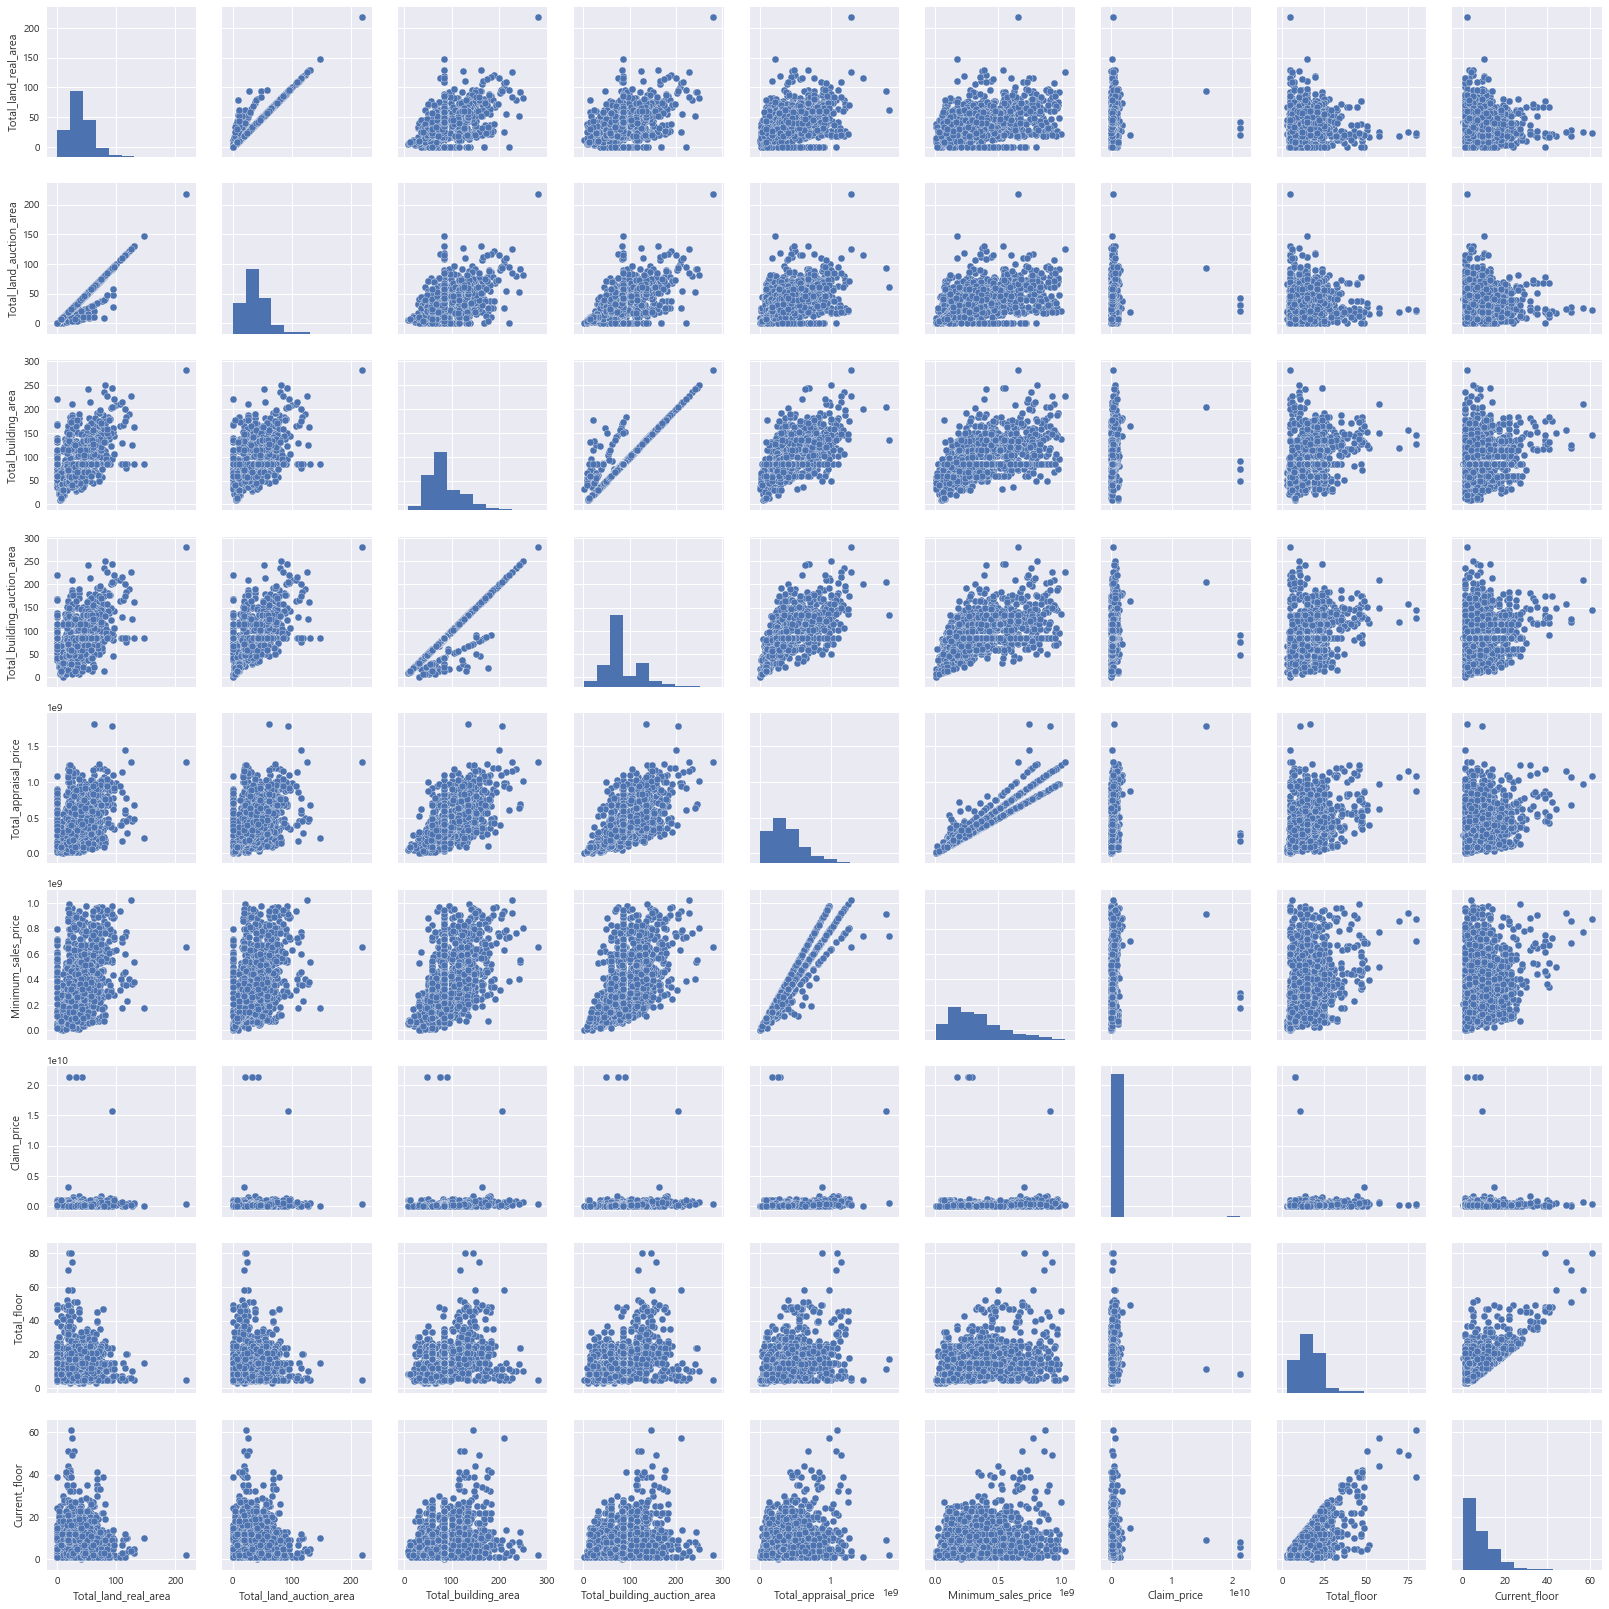

In [159]:
# Hammer_price와 상관관계가 높은 변수들 간에 pairplot
coef2 = df_temp.loc[:,['Total_land_real_area','Total_land_auction_area','Total_building_area','Total_building_auction_area','Total_appraisal_price','Minimum_sales_price','Claim_price', 'Total_floor', 'Current_floor']]
sns.pairplot(coef2)

In [160]:
# 다중선형회귀분석 돌리고 싶은 설명변수 데이터프레임 만듦
variables2 = pd.concat([variables,coef2],axis=1)
variables2.head(2)

,Hammer_counts_en,After_apparaisal_period_en,different1_en,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Claim_price,Total_floor,Current_floor
0,0,2,0,37.35,37.35,181.77,181.77,836000000,668800000,1766037301,45,5
1,0,1,0,18.76,18.76,118.38,118.38,1073000000,858400000,152946867,70,51


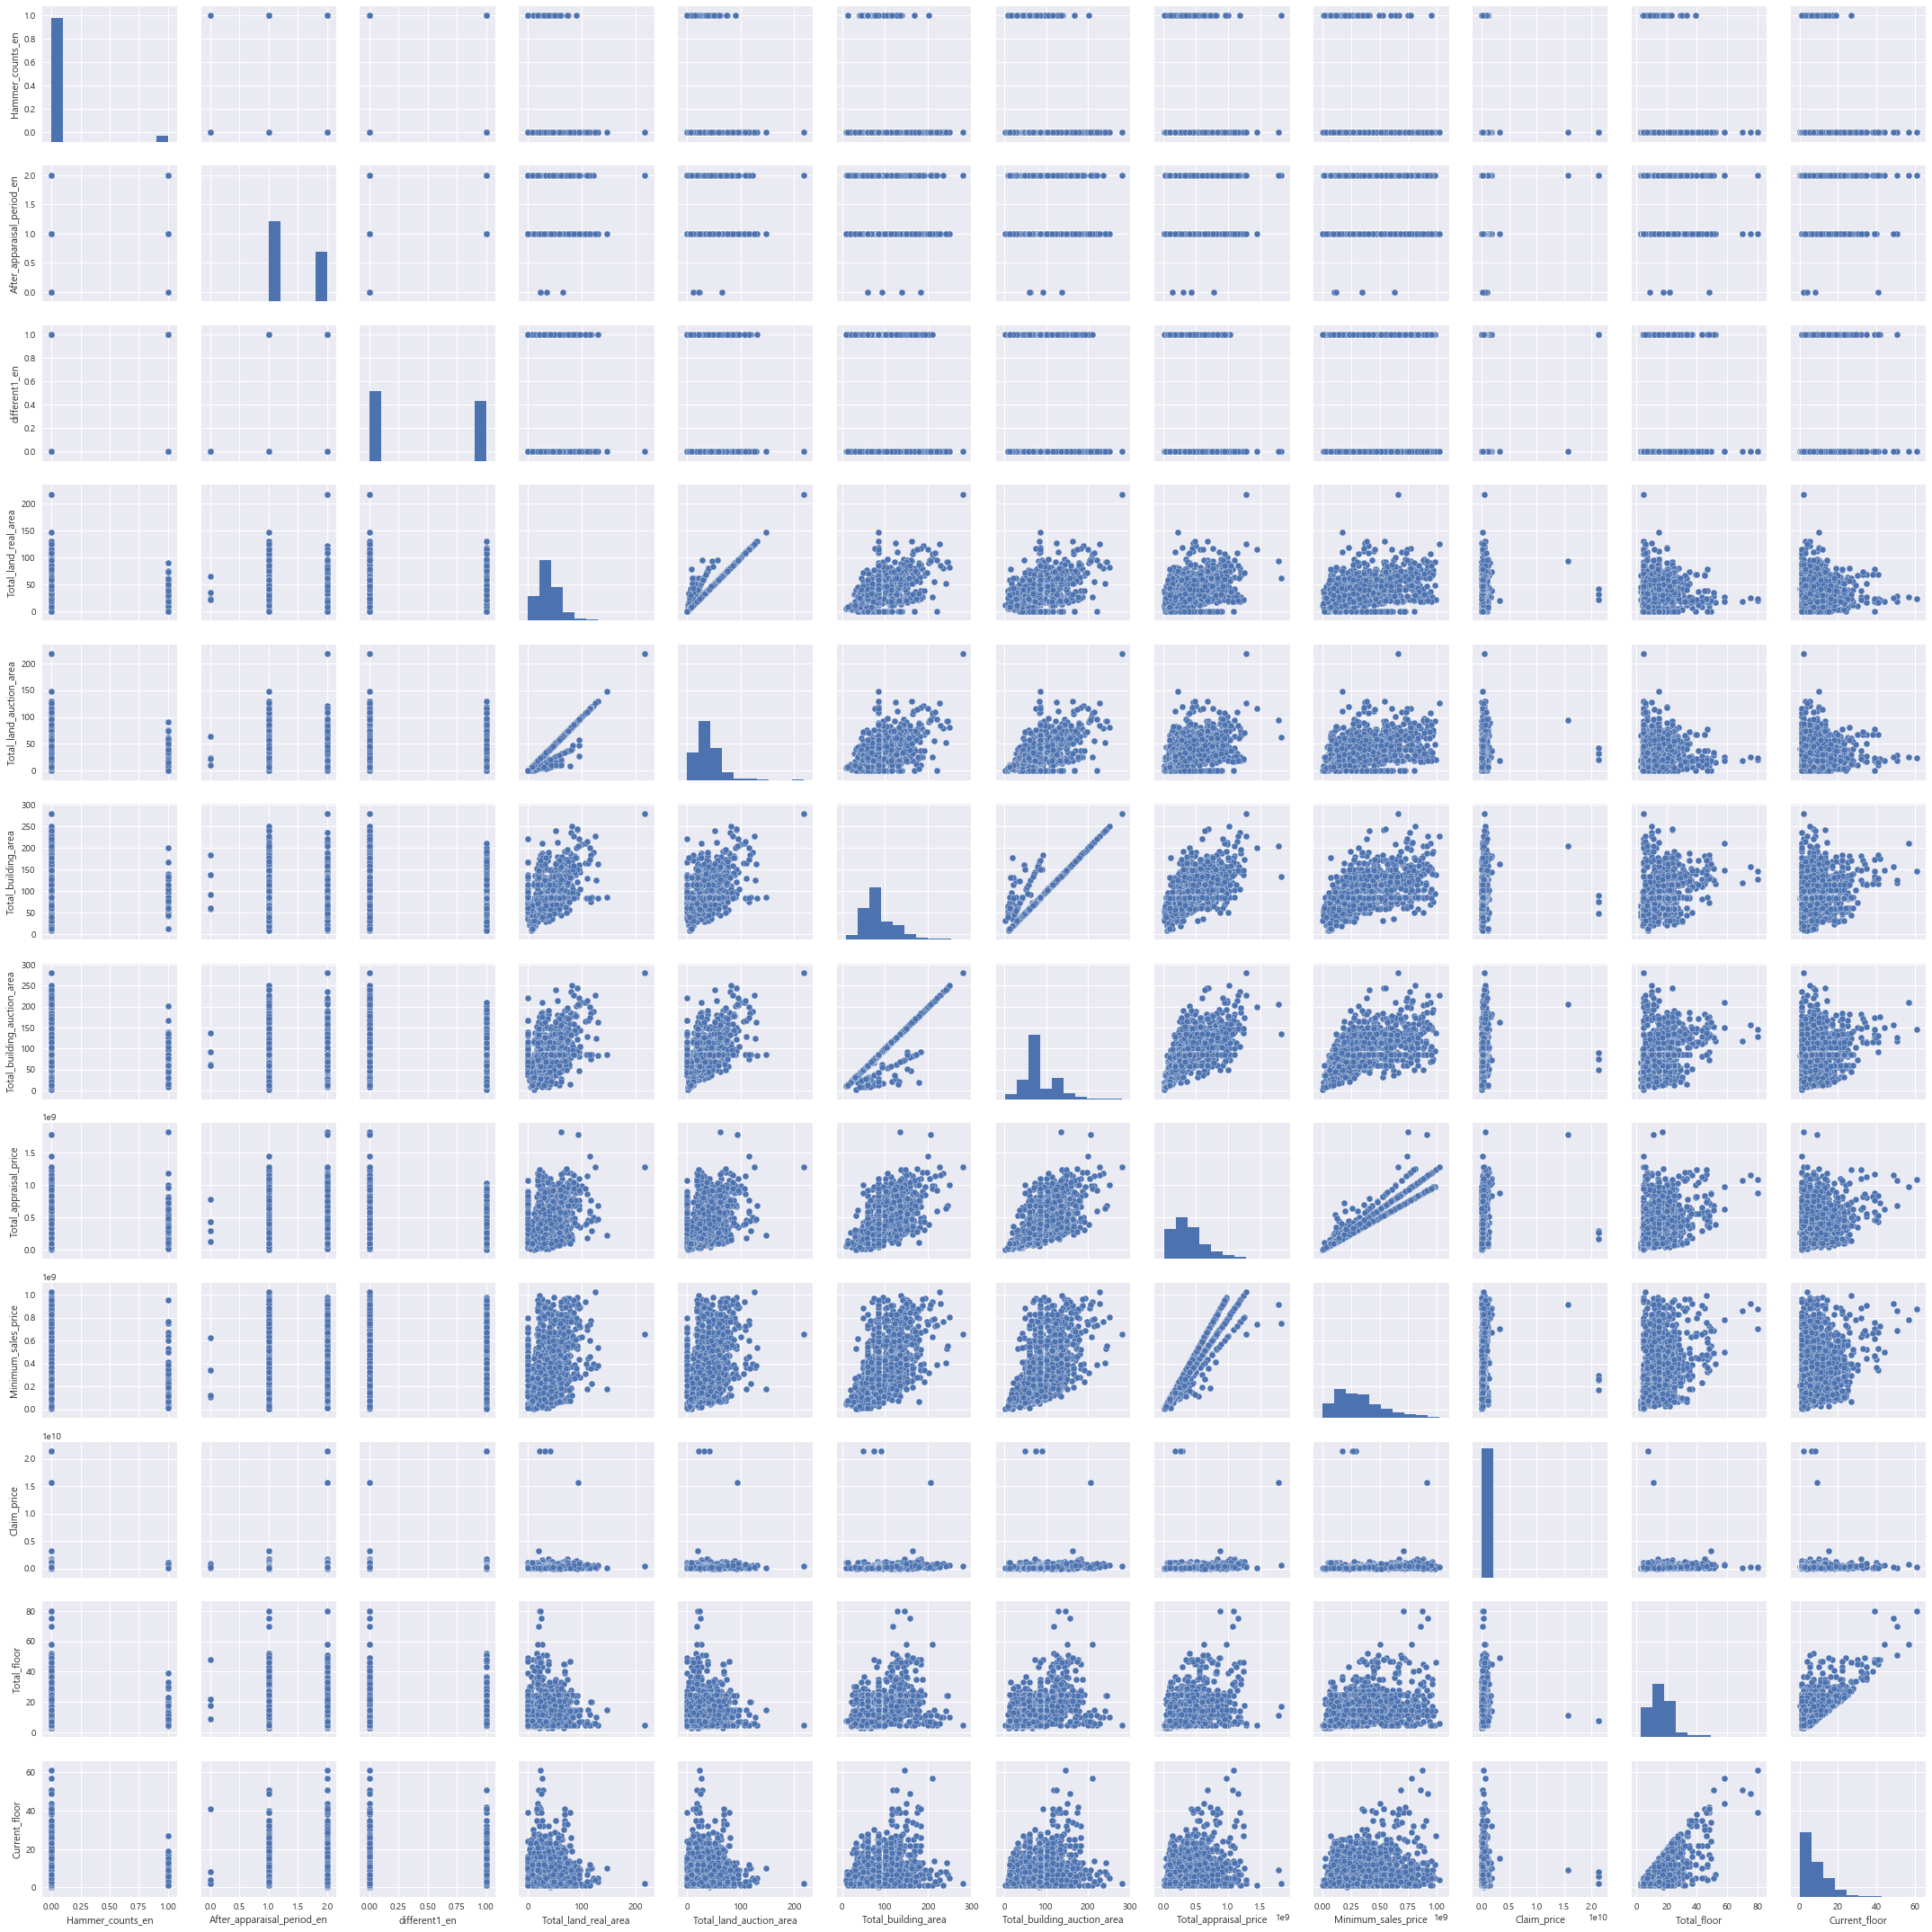

In [161]:
# 설명 변수들 간의 pairplot 확인
sns.pairplot(variables2)

In [162]:
# 설명 변수들 간의 VIF 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif["features"] = variables2.columns
vif.sort_values(["VIF Factor"], ascending=[False])


,VIF Factor,features
5,410.442760,Total_building_area
6,405.238601,Total_building_auction_area
3,391.712169,Total_land_real_area
4,388.213769,Total_land_auction_area
7,69.180540,Total_appraisal_price
8,67.331000,Minimum_sales_price
10,8.704285,Total_floor
1,5.180141,After_apparaisal_period_en
11,4.210853,Current_floor
2,2.651016,different1_en


- 다중회귀시의 설명 변수간의 다중공선성은 높게 나온다.
- 그러나 설명변수들 자체가 area,price 등 상식적으로도 서로 관계가 높은 사회과학 변수들이기 때문에 할 수 없다.
- 혹은 vif 해결하기 위해서는 릿지 회귀분석을 사용하면 된다.

## Model
- 실습 때 배운 두 가지 방법으로 회귀분석
- task1의 데이터 행렬을 통해서 값 추출

##### 회귀분석1

In [163]:
X = variables2
y = df2['Hammer_price']

In [164]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [165]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
# fit된 모델의 R_square
model.score(X_train,y_train)

0.9774878883183689

In [167]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

1239304065303276.2

In [168]:
# test 데이터 R-square
model.score(X_test,y_test)

0.9816044329747403

##### 회귀분석2

In [169]:
variables2.columns

Index(['Hammer_counts_en', 'After_apparaisal_period_en', 'different1_en',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'Claim_price',
       'Total_floor', 'Current_floor'],
      dtype='object')

In [170]:
target=df2['Hammer_price']

In [171]:
v3 = pd.concat([variables2,target],axis=1)
v3.columns

Index(['Hammer_counts_en', 'After_apparaisal_period_en', 'different1_en',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'Claim_price',
       'Total_floor', 'Current_floor', 'Hammer_price'],
      dtype='object')

In [172]:
import statsmodels.api as sm

reg = sm.OLS.from_formula("target ~ Hammer_counts_en+ After_apparaisal_period_en + different1_en + Total_land_real_area + Total_land_auction_area + Total_building_area + Total_building_auction_area + Total_appraisal_price + Minimum_sales_price + Claim_price + Total_floor + Current_floor", v3).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6722.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:10:03   Log-Likelihood:                -33711.
No. Observations:                1796   AIC:                         6.745e+04
Df Residuals:                    1783   BIC:                         6.752e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.126e+07    3.7e+06      3.041      0.002       4e+06    1.85e+07
Hammer_counts_en            -1.298e+07   4.08e+06     -3.178      0.002    -2.1e+07   -4.97e+06
After_apparaisal_period_en  -3.436e+06   1.67e+06     -2.056      0.040   -6.72e+06   -1.58e+05
different1_en                 3.45e+06   2.02e+06      1.706      0.088   -5.15e+05    7.41e+06
Total_land_real_area         4.409e+05   3.67e+05      1.202      0.230   -2.78e+05    1.16e+06
Total_land_auction_area     -3.063e+05   3.72e+05     -0.823      0.410   -1.04e+06    4.23e+05
Total_building_area         -2.887e+05   1.72e+05     -1.675      0.094   -6.27e+05    4.94e+04
Total_building_auction_area  1.308e+05   1.75e+05      0.749      0.454   -2.12e+05    4.73e+05
Total_appraisal_price           0.2457      0.015     16.649      0.000       0.217       0.275
Minimum_sales_price             0.8426      0.017     48.741      0.000       0.809       0.876
Claim_price                     0.0020      0.001      2.569      0.010       0.000       0.003
Total_floor                  2.079e+05   1.36e+05      1.532      0.126   -5.82e+04    4.74e+05
Current_floor               -1.611e+05    1.5e+05     -1.077      0.282   -4.54e+05    1.32e+05
==============================================================================
Omnibus:                      314.220   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6700.453
Skew:                           0.005   Prob(JB):                         0.00
Kurtosis:                      12.462   Cond. No.                     5.86e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 회귀분석2 에 나온 beta 값과 행렬식으로 구한 beta값의 비교

In [173]:
import numpy as np
from numpy.linalg import inv 

def estimate_beta(x, y):
    x = x
    xtx_i = np.linalg.inv(np.dot(x.T,x)) 
    xtx_ixt = np.dot(xtx_i,x.T)
    beta_hat = np.dot(xtx_ixt,y)
    return beta_hat

In [174]:
X = variables2
y = target
beta0 = np.ones((1796,1))
X2 = np.concatenate((beta0,X),axis=1)

In [190]:
ebeta = estimate_beta(X2,y).reshape(-1,1)
ebeta
# 데이터 행렬로 추정된 beta array

array([[ 1.12613782e+07],
       [-1.29804465e+07],
       [-3.43649182e+06],
       [ 3.44975619e+06],
       [ 4.40859217e+05],
       [-3.06334865e+05],
       [-2.88729903e+05],
       [ 1.30758037e+05],
       [ 2.45714784e-01],
       [ 8.42563178e-01],
       [ 1.95134179e-03],
       [ 2.07918508e+05],
       [-1.61067552e+05]])

In [ ]:
# 데이터 행렬로 구한 MSE
# e = Y-Y_hat
# SSE = e.T * e
# MSE = SSE / 자유도

In [212]:
Y_hat = np.dot(X2,ebeta).reshape(-1,1)
y2 = np.array(y)
e = y2 - Y_hat
e2 = e.reshape(-1,1)

In [217]:
SSE = np.dot(e2.T,e2)
MSE = SSE/(1796-13-1)
MSE

array([[1.9500165e+20]])

In [218]:
# 비교
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

1239304065303276.2